# Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

For a gym, it makes sense to say a customer has left if they don't come for a month.
Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

**You should:**
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
    - Identify target groups
    - Suggest measures to cut churn
    - Describe any other patterns you see with respect to interaction with customers

## Plan of research:

**Step 1. Open the data file and read the general information**

**Step 2. Carry out exploratory data analysis (EDA)**

- Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
- Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
- Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
- Build a correlation matrix and display it.

**Step 3. Build a model to predict user churn**

- Build a binary classification model for customers where the target feature is the user's leaving next month.
- Divide the data into train and validation sets using the train_test_split() function.
- Train the model on the train set with two methods:
    - logistic regression
    - random forest
- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
Remember to indicate the random_state parameter when dividing data and defining the algorithm.


**Step 4. Create user clusters**

Set aside the column with data on churn and identify object (user) clusters:
- Standardize the data.
- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
- Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
- Look at the mean feature values for clusters. Does anything catch your eye?
- Plot distributions of features for the clusters. Do you notice anything?
- Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

**Step 5. Come up with conclusions and basic recommendations on working with customers**

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.

## Import & install libraries for research

Let's start by importing the needed libraries and modules.

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from matplotlib import pyplot as plt

from plotly.subplots import make_subplots
import plotly.express as px

import seaborn as sns

In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [3]:
def data_info(data):
    print('-'*65)
    print('\033[1m INFO: \033[0m ')
    print(' ')
    display( data.info(memory_usage='deep'))
    print('-'*65)
    print('\033[1m HEAD: \033[0m ')
    display( data.head(10))
    print(' ')
    print('-'*65)
    print('\033[1m DESCRIBE: \033[0m ')
    display( data.describe())
    print('-'*65)
    print('\033[1m MISSING VALUES: \033[0m ')
    print(' ')
    display( data.isna().sum())
    print('-'*65)
    print('\033[1m DUPLICATED: \033[0m')
    print('We have {} duplicated rows!'.format(data.duplicated().sum()))

#for convenience, display a table of all columns and convert the data to the format of three decimal places
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.3f}'.format
#ssetting seaborn visualization
sns.set_palette('Dark2')
sns.set_style('darkgrid')

## Step 1. Description the data

### Load data

We have to load the database, analyze the data for incorrect and missing values. After we prepare our database for work, we need to turn to the main tasks that we want to study.

In [4]:
#creating variable for dataset path
data_path = '/Users/lanadashevsky/Practicum DA projects/datasets/'

In [5]:
try:
    data = pd.read_csv('gym_churn_us.csv')
    
except:
    data = pd.read_csv(data_path+'gym_churn_us.csv')
    
    #, parse_dates = ['EventTimestamp']

In [6]:
data_info(data)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non

None

-----------------------------------------------------------------
 HEAD:  


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0
5,1,1,0,0,1,1,1,34,450.744,1.000,3,2.623,2.637,0
6,1,1,1,1,0,6,1,32,94.266,6.000,2,1.139,1.277,0
7,0,1,0,0,1,1,0,30,217.787,1.000,0,1.214,1.049,1
8,1,1,1,1,1,1,1,23,45.410,1.000,1,1.106,1.059,0
9,0,1,0,0,1,1,0,31,65.311,1.000,11,1.811,1.951,0


 
-----------------------------------------------------------------
 DESCRIBE:  


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,"4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000","4,000.000"
mean,0.510,0.845,0.487,0.308,0.903,4.681,0.412,29.184,146.944,4.323,3.725,1.879,1.767,0.265
std,0.500,0.362,0.500,0.462,0.295,4.550,0.492,3.258,96.356,4.191,3.749,0.972,1.053,0.442
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,18.000,0.148,1.000,0.000,0.000,0.000,0.000
25%,0.000,1.000,0.000,0.000,1.000,1.000,0.000,27.000,68.869,1.000,1.000,1.181,0.963,0.000
50%,1.000,1.000,0.000,0.000,1.000,1.000,0.000,29.000,136.220,1.000,3.000,1.833,1.720,0.000
75%,1.000,1.000,1.000,1.000,1.000,6.000,1.000,31.000,210.950,6.000,5.000,2.536,2.510,1.000
max,1.000,1.000,1.000,1.000,1.000,12.000,1.000,41.000,552.591,12.000,31.000,6.024,6.147,1.000


-----------------------------------------------------------------
 MISSING VALUES:  
 


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


User data for the preceding month
- `'gender'`
- `'Near_Location'` — whether the user lives or works in the neighborhood where the gym is located
- `'Partner'` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- `Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- `'Phone'` — whether the user provided their phone number
- `'Age'`
- `'Lifetime'` — the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status
- `'Contract_period'` — 1 month, 3 months, 6 months, or 1 year
- `'Month_to_end_contract'` — the months remaining until the contract expires
- `'Group_visits'` — whether the user takes part in group sessions
- `'Avg_class_frequency_total'` — average frequency of visits per week over the customer's lifetime
- `'Avg_class_frequency_current_month'` — average frequency of visits per week over the preceding month
- `'Avg_additional_charges_total'` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

**Conclusions**

Our data has 4000 rows and 14 columns total. All presented data in columns numeric. 
No duplicated rows.

 - we need to rename the columns for more convenient work;
 - we need to convert the Month_to_end_contract field to the Integer type;
 - we will transfer Contract_period to a categorical type for the convenience of data processing for further work.

## Step 2. Exploratory data analysis (EDA)

- Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
- Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
- Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
- Build a correlation matrix and display it.

In [7]:
#rename column names 
data.columns = map(str.lower, data.columns)
data = data.rename(columns = {'avg_additional_charges_total': 'additional_charges',
                             'month_to_end_contract': 'month_end_contract',
                             'avg_class_frequency_total': 'frequency_total',
                             'avg_class_frequency_current_month': 'freq_current_month'})

### Study the mean values and standard deviation.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.000",0.510,0.500,0.000,0.000,1.000,1.000,1.000
near_location,"4,000.000",0.845,0.362,0.000,1.000,1.000,1.000,1.000
partner,"4,000.000",0.487,0.500,0.000,0.000,0.000,1.000,1.000
promo_friends,"4,000.000",0.308,0.462,0.000,0.000,0.000,1.000,1.000
phone,"4,000.000",0.903,0.295,0.000,1.000,1.000,1.000,1.000
contract_period,"4,000.000",4.681,4.550,1.000,1.000,1.000,6.000,12.000
group_visits,"4,000.000",0.412,0.492,0.000,0.000,0.000,1.000,1.000
age,"4,000.000",29.184,3.258,18.000,27.000,29.000,31.000,41.000
additional_charges,"4,000.000",146.944,96.356,0.148,68.869,136.220,210.950,552.591
month_end_contract,"4,000.000",4.323,4.191,1.000,1.000,1.000,6.000,12.000


- **`'gender'`** - is almost neatly devided for both genders: 51 to 49%
- **`'near_location'`** — more gym clients live or working nearby (ratio 1 to 5)
- **`'partner'`** — half of the clients came through a partnership agreement
- **`promo_friends`** — only 30% of the people who connected through the "bring a friend" campaign
- **`'phone'`** — most clients about 90% left a phone number
- **`'age'`** - the average age of people attending the gym is 27-30 years old
- **`'lifetime'`** — Based on lifetime, users who use a monthly subscription do not use it for the first time, since the number of users on a monthly subscription is 2207, but at the same time, those who registered a month ago are 843 in total.

Data from the log of visits and purchases and data on current membership status
- **`'contract_period'`** — 60% of users on a 1 month contract (it is possible that they are testing the club or the price of other packages is less attractive to buy a package for 6 or 12 months at once.
- **`'group_visits'`** — the number of people who do not attend group classes is greater.
- **`'frequency_total'`** — visitors on average visit the hall 2 times a week, 
- **`'freq_current_month'`** — for the current month the average is slightly less, but not significantly.
- **`'additional_charges'`** — on average, in addition to the subscription fee, visitors spend about 130-145. for additional room services. About 10% of visitors pay 250 and more.


- **`churn`** - the number of those who continued to use the hall's services is higher, the outflow of customers is quite high and amounts to 25%.

In [9]:
data.month_end_contract = data.month_end_contract.astype(np.int64)
data['contract_period_cat'] = data['contract_period'].replace({1: '1m', 6: '6m',12:'1y'})

### Study churn and stayed groups

Next, we'll take a look at means for two groups by **`churn`** : for those who left and for those who stayed.

In [10]:
data.churn.value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [11]:
data.groupby('churn').mean().T.rename(columns={0: 'Stayed', 1: 'Left'})

churn,Stayed,Left
gender,0.510,0.511
near_location,0.873,0.768
partner,0.534,0.355
promo_friends,0.354,0.184
phone,0.904,0.903
contract_period,5.747,1.729
group_visits,0.464,0.269
age,29.977,26.990
additional_charges,158.446,115.083
month_end_contract,5.283,1.663


Let's see what happens to the distribution of customers of those who left and stayed with respect to our data.

- **`'gender'`** - the distribution is even, there is no skew between those who leave and those who stay.
- **`'near_location'`** — the difference between those who stayed closer to the location of the hall is about 10%.
- **`'partner'`** — the number of customers who use the affiliate program  53% versus 35% of those who do not use such a program. It is possible that the affiliate program gives discounts and has a positive effect on the fact that customers stay.
- **`promo_friends`** — only 35% of those who came under the "bring a friend" program remained. Perhaps this is influenced by the fact that it is more interesting to train with friends, the outflow for this indicator is 18% and it is worth paying attention to why people who came on the recommendations of friends did not remain customers.
- **`'age'`** - looks like those who leave are a bit younger than those who stay.
- **`'lifetime'`** — those who stay use the subscription for more than 4.7 months, and those who leave are people who use it for about a month. It is worth paying attention to this - why do people leave after a month?

Data from the log of visits and purchases and data on current membership status
- **`'contract_period'`** — those who stay have a little more than 5 months until the end of the contract, those who stop using have just over 1.5 months left before the end of the contract. But it is worth considering these data in more detail.
- **`'group_visits'`** — if you look at group classes, 46% of the people attending group classes continued to use the services. 27% left and it is worth conducting a study "what did the clients not like in group classes?"
- **`'frequency_total'`, `'freq_current_month'`** — if you look at the frequency of visits, then those who stay come on average 2 times a week, both globally and during the last month. And those who left - traveled 1.5 days in general or once a week for a month.
- **`'additional_charges'`** — this parameter may be influenced by outliers, for now it looks like those who leave spend less on average than those who stay.

### Plot bar histograms and feature distributions

In [12]:
data.sample(4)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges,month_end_contract,lifetime,frequency_total,freq_current_month,churn,contract_period_cat
3266,0,1,0,0,1,1,0,32,66.049,1,6,2.839,2.755,0,1m
3227,1,1,1,0,0,1,0,32,49.115,1,2,2.159,2.121,0,1m
461,1,1,0,0,1,12,1,30,185.485,12,3,0.497,0.609,0,1y
508,0,1,0,0,1,1,1,27,126.445,1,6,4.158,4.335,0,1m


In [13]:
def show_plot(data, column, hue_name, pl_type):
    fig, ax = plt.subplots(figsize=(7,5))
    sns.set_palette('viridis')
    plt.title('Features distribution '+column, fontdict={'size':14})
    if pl_type == 'plot':
        sns.countplot(x=column, data=data, hue=hue_name)
    else:
        sns.kdeplot(x=column, data=data, hue=hue_name, shade=True, palette='viridis')
    plt.xlabel(column)
    plt.show()
    

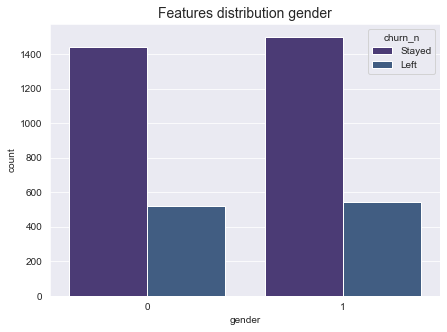

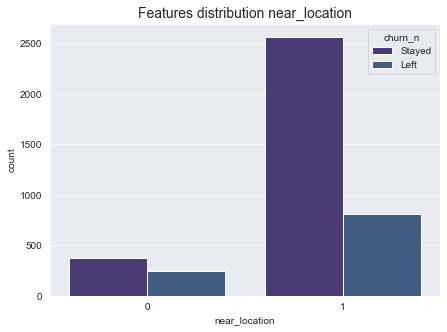

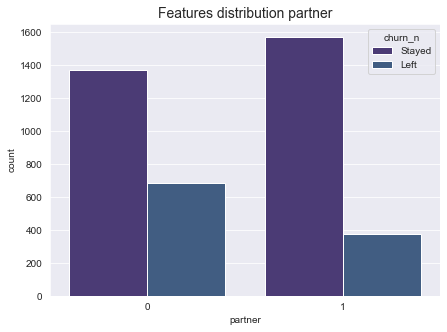

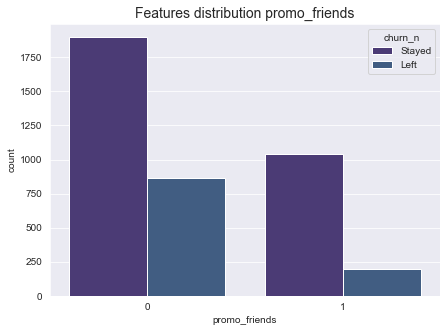

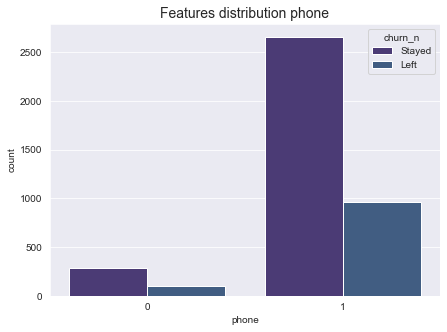

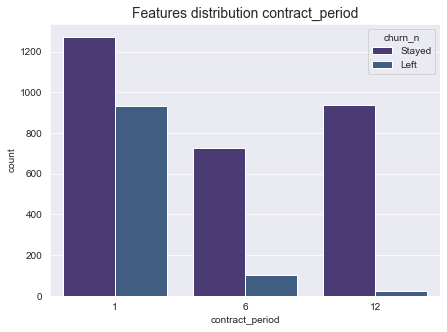

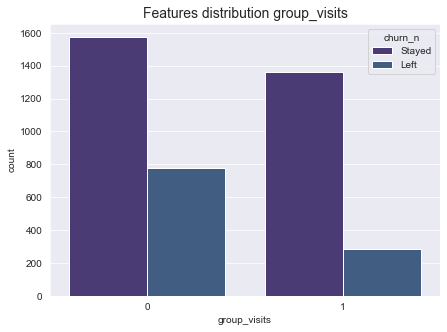

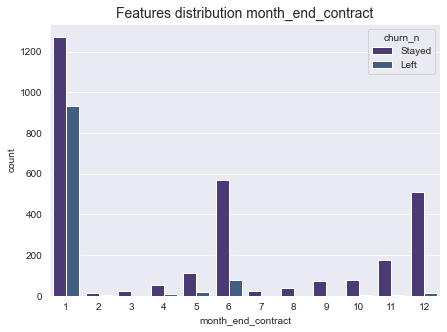

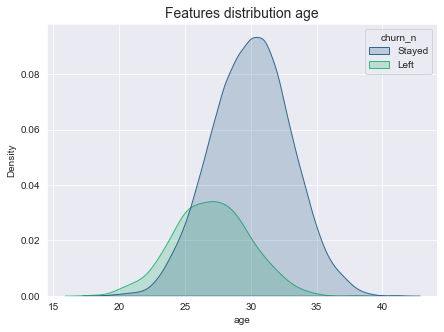

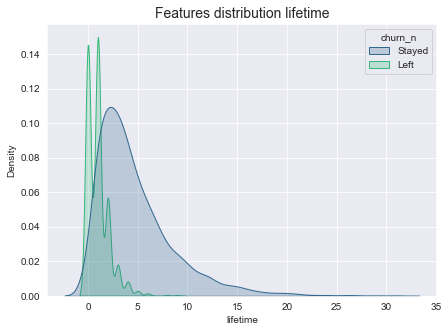

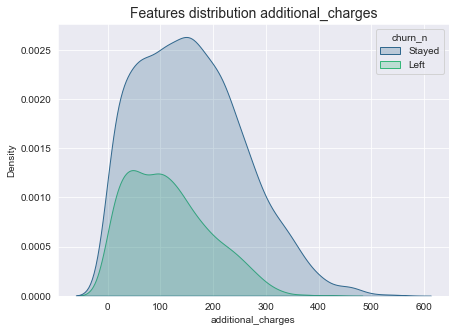

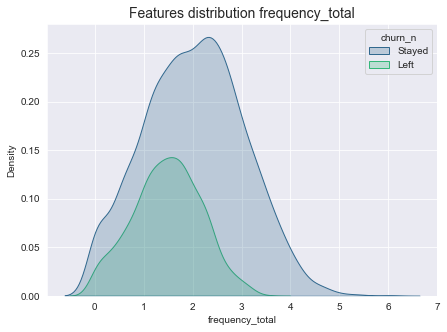

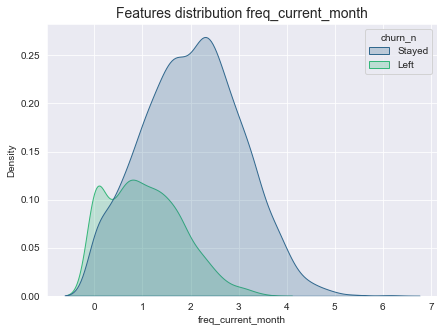

In [14]:
categorical_columns = ['gender',
                     'near_location',
                     'partner',
                     'promo_friends',
                     'phone',
                     'contract_period',
                     'group_visits',
                     'month_end_contract']

numerical_columns = ['age',
                    'lifetime',
                    'additional_charges',
                    'frequency_total',
                    'freq_current_month']

data['churn_n'] = data['churn'].replace({0:'Stayed', 1:'Left'})

for column in categorical_columns:
    show_plot(data, column, 'churn_n', 'plot')
    
for column in numerical_columns:
    show_plot(data, column, 'churn_n', 'kde')
    

**Conclusion**

**`gender, near_location, promo_friends`** and **`phone`** have very similar distributions for both churn and non-churn. Although in the value of `promo_friends` we see that there is a difference.

the **`partner`** program shows the difference values for churn and no churn, making it clear that most of the churn does not come from partner companies.

**`contract_period`**: numeric categorical variable. We see that clients with a longer contract of 1 year or 6 months stay. An alarming trend - more than half of the clients who leave have a contract for 1 month

**`age`**: we can see that the data follows a normal distribution and is also distributed differently for churn and no churn. The average value for clients without churn is distributed higher than for clients with churn - about 30-31 years old, and the churn is about 27. It can be said that younger ones leave more often.

**`additional_charges`** is skewed to the right, mean and median are different for both groups. Churn and no churn follow a similar distribution pattern, with half of customers spending less than 105 per month on churn and less than 150 on no churn. Here we see a clear difference: non-churn spends more on average than churn.

**`month_end_contract`**: another categorical numeric variable. The picture looks about the same as with the contract_period variable, they can be highly correlated. Same for medians: 1 for outflow and 6 for non-outflow.

**`lifetime`**: it looks like outliers have more of an effect on no churn than churn, but not to an extreme degree. For churn, half of the customers have a lifetime of one month, not a churn of 4.

**`frequency_total`**: the data is skewed to the right, however we can see that the means and medians are pretty close. As for churn, they visit the gym on average 0.5 less than non-churn.

**`freq_current_month`**: very similar to the previous variable.

### Correlation matrix.

Text(120.453125, 0.5, 'features')

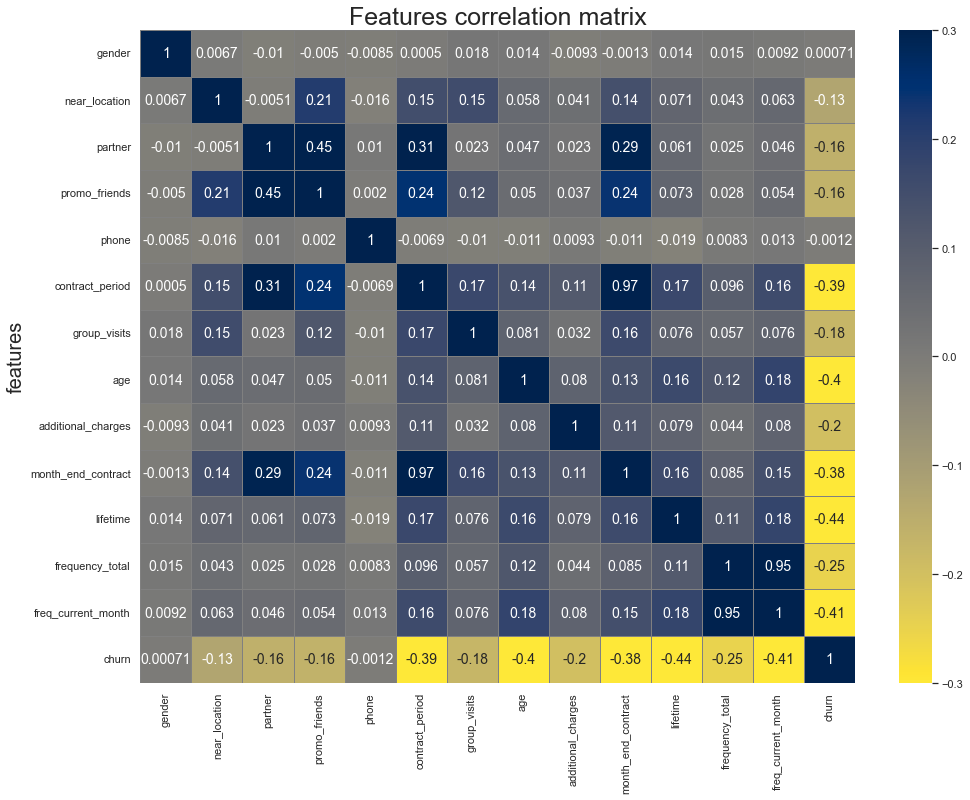

In [15]:
#building a correlation matrix
gym_corr = data.corr()

#visualization
sns.set(style='white')
plt.figure(figsize=(16, 12))
plt.title('Features correlation matrix', fontsize = 25)
sns.heatmap(
    gym_corr, annot=True, linewidths=1, annot_kws={"fontsize":14}, 
    vmax=0.3, vmin=-0.3, cmap='cividis_r', linecolor='grey'    
)
plt.ylabel('features', fontsize=20)

**Conclusion**

Looking at the correlation matrix, we can find multicollinear features - **`contract_period`** and **`month_end_contract`**, **`frequency_current_month`** and **`frequency_total`**. There are signs with zero correlation with the target variable, these are `phone` and `gender`, they do not affect the outflow at all. 

Most strongly affect to the **`churn`** has:
- **`lifetine`** - time since the first visit to the fitness center,
- **`frequency_current_month`** number of visits per month
- **`age`** (this is an unexpected find)
- **`contract_period`** duration of the current abonement
- the presence of discounts on the partners program or the fact that the client was invited by a friend.

In order for such features not to dominate over other variables during training, we remove **`month_end_contract`** and **`frequency_total`** from the model. We'll also remove the `gender` and `phone` columns as they don't have a significant impact on **`churn`**.

In [16]:
#dropping features with too high mutual and low coefficient
data_predict = data.drop(['month_end_contract', 'frequency_total', 'contract_period_cat', 'churn_n'], axis=1)
data_predict.sample(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges,lifetime,freq_current_month,churn
1420,0,1,0,1,1,12,1,30,339.595,2,2.118,0
1092,0,1,1,1,1,1,0,33,151.816,3,1.429,0


## Step 3. Build a model to predict user churn

- Build a binary classification model for customers where the target feature is the user's leaving next month.
- Divide the data into train and validation sets using the train_test_split() function.
- Train the model on the train set with two methods:
    - logistic regression
    - random forest
- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
Remember to indicate the random_state parameter when dividing data and defining the algorithm.


### Train the model

In [17]:
# divide the data into features (the X matrix) and a target variable (y)

X = data_predict.drop('churn', axis=1) # write your code here
y = data_predict['churn'] # write your code here


In [18]:
#dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# create a StandardScaler object and apply it to the train set
scaler = StandardScaler() 
X_train_st = scaler.fit_transform(X_train) # train the scaler and transform the matrix for the train set

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

### Make prediction and models evaluation

In [19]:
#function for printing out several metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [20]:
#defining list of models we would like to check
models = [LogisticRegression(random_state=0), RandomForestClassifier(n_estimators=100, max_features = 9, random_state=0)]


In [21]:
# the function that takes the model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print_all_metrics(y_test, y_pred, y_proba)

# write a loop that outputs metrics for each model
for i in models:
    print('-'*45)
    print(i)
    make_prediction(m=i, X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)

---------------------------------------------
LogisticRegression(random_state=0)
Classification metrics
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
	ROC_AUC: 0.97
---------------------------------------------
RandomForestClassifier(max_features=9, random_state=0)
Classification metrics
	Accuracy: 0.90
	Precision: 0.82
	Recall: 0.80
	ROC_AUC: 0.95


Both models are quite capable of making predictions.

We're going to solve a binary classification problem here (we want to predict whether a user stays or leaves, 0 or 1), so we'll start with a simple LogisticRegression model. In parallel, we would like to test a more powerful algorithm, so we will choose RandomForestClassifier. We split the dataset we have into training and validation (test) data with an 80/20 ratio. This is a simpler approach, but it's good enough for us for now. After that, we standardized the feature matrices of both the training and test data, as well as trained our models, made predictions, and printed important metrics such as accuracy, validity, and recall scores.

However, the **LogisticRegression model** is more suitable for all indicators: accuracy, precision, recall and the most accurate metric for assessing the quality of the ROC_AUC classifier.

## Step 4. Create user clusters

Set aside the column with data on churn and identify object (user) clusters:
- Standardize the data.
- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
- Train the clustering model with the K-means algorithm and predict customer clusters. 
- Look at the mean feature values for clusters. Does anything catch your eye?
- Plot distributions of features for the clusters. Do you notice anything?
- Calculate the churn rate for each cluster. Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

### Dendrogram

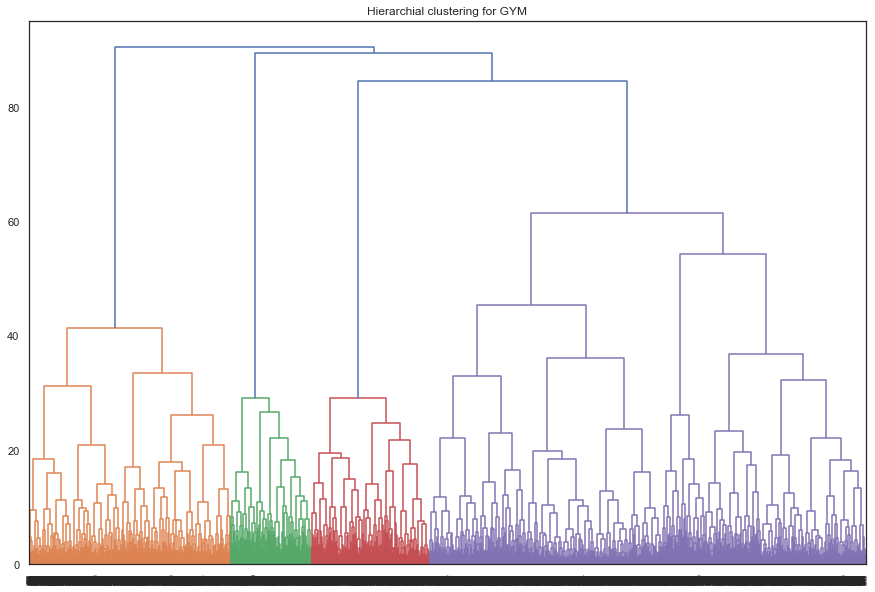

In [22]:
# plotting a dendrogram
# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

### K-Mean clustering

In [23]:
# the obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5, random_state=0) # setting the number of clusters as 5
labels = km.fit_predict(X_sc) # applying the algorithm to the data and forming a cluster vector 

#storing cluster labels in the field of our dataset
data_predict['cluster_km'] = labels
data_predict.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.496,0.500,0.501,0.534,0.523
near_location,0.996,0.000,1.000,0.996,0.863
partner,0.892,0.489,0.217,0.379,0.472
promo_friends,1.000,0.079,0.072,0.010,0.306
phone,1.000,1.000,1.000,1.000,0.000
contract_period,6.923,2.995,2.010,6.209,4.777
group_visits,0.525,0.233,0.277,0.538,0.427
age,29.606,28.679,27.584,30.699,29.298
additional_charges,153.425,137.126,119.340,176.260,144.208
lifetime,4.283,2.975,1.923,5.415,3.940


### Churn Rates for clusters

In [24]:
churn_rate = data_predict.groupby(['cluster_km']).agg({'age':'count', 'churn':'sum'}).reset_index()
churn_rate.columns = ['cluster', 'total_users', 'churn_users']
churn_rate['churn_rate, %'] = ((churn_rate['churn_users'] / churn_rate['total_users']) * 100).round(2)
churn_rate

,cluster,total_users,churn_users,"churn_rate, %"
0,0,985,118,11.980
1,1,558,225,40.320
2,2,1064,600,56.390
3,3,1007,15,1.490
4,4,386,103,26.680


As we can see, clusters vary greatly in terms of churn rate.  
Cluster 3 has the lowest churn rate (1.5%). Clients from clusters 0 quite loyal and their churn rate is ~12%. Cluster 4 customers have a churn rate of ~27%.
Two clusters have the highest churn for us - clusters 1 and 2 with values of 40% and 56% respectively.

Let's build graphs and consider the distribution of data by features in more detail.

### Plots distributions of features for the clusters

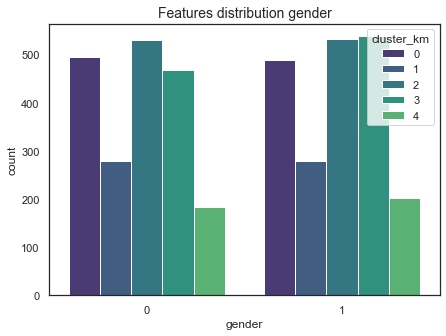

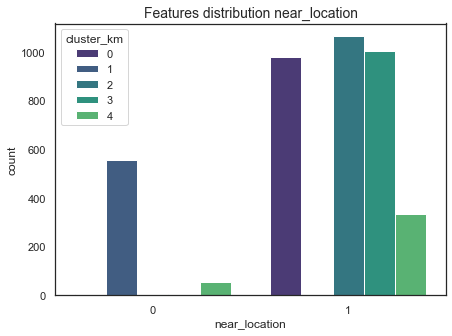

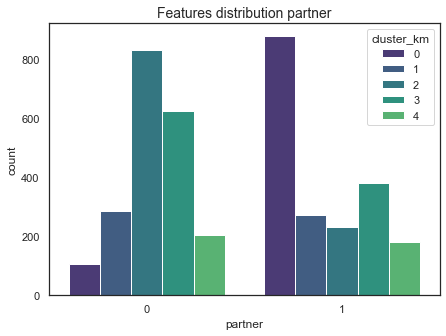

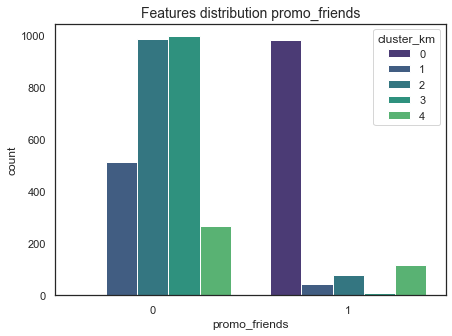

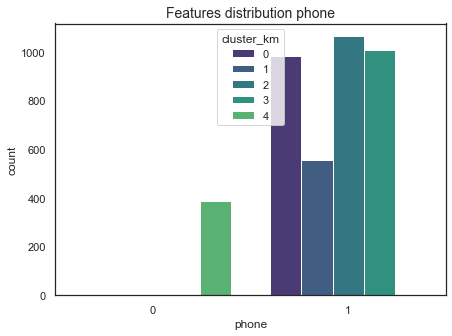

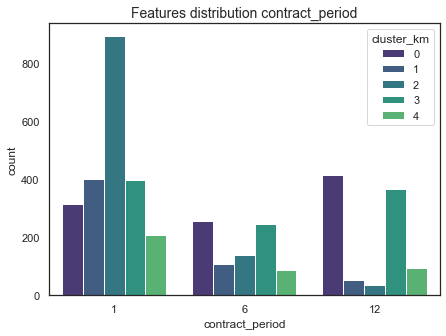

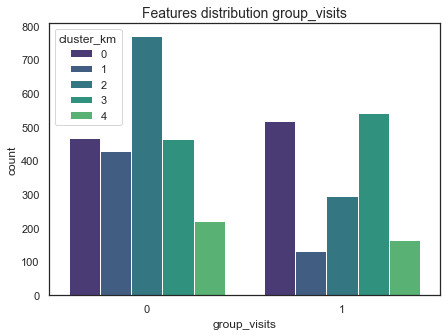

In [25]:
log_discr_values = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']



for column in log_discr_values:
    show_plot(data_predict, column, 'cluster_km', 'plot')


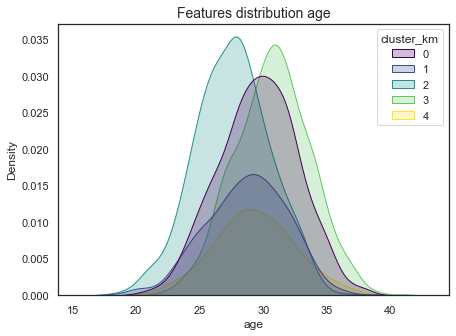

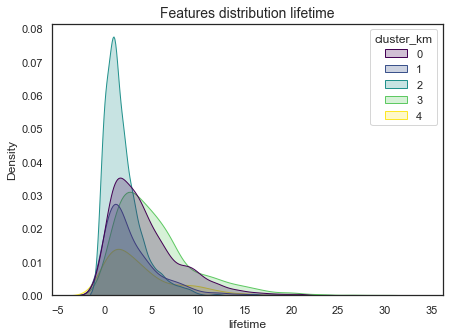

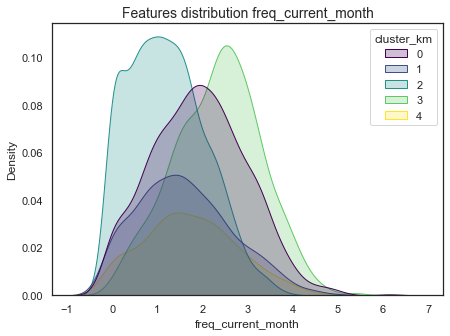

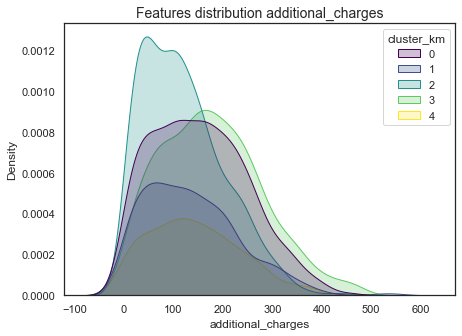

In [26]:
cont_values = ['age', 'lifetime', 'freq_current_month', 'additional_charges']

for column in cont_values:
    show_plot(data_predict, column, 'cluster_km', 'kde')

**Cluster 0**
- equal distribution between males and females
- clients from this cluster live near the gym
- the majority (almost 90%) came through the partners program
- and use the refer a friend program
- half of the clients from this cluster attend group classes
- average age 29 years
- half of the customers have long-term abonnement for 12 months, another ones have for 1 month
- additional expenses in addition to subscription 154ue
- use the gym for about 4 months
- visit about 2 times a week
- churn rate - 12%

**Cluster 1**
- equal distribution between males and females
- clients from this cluster live far from the gym
- half came through an partners program
- only 8% used the "refer a friend" program
- only 23% of clients from this cluster attend group classes
- average age 28 years
- additional expenses in addition to subscription 137ue
- use the gym for about 3 months
- visit an average of 1.5 times a week
- churn rate - 40%

**Cluster 2**
- equal distribution between males and females
- clients from this cluster live close to the gym
- only 20% came through the partners program
- only 7% used the "refer a friend" program
- about 27% of clients from this cluster attend group classes
- almost everyone has a abonnement for 1 month 
- average age 27 years
- additional expenses in addition to subscription 119ue
- use the gym for about 2 months
- visit on average a little more than once a week
- churn rate - 56%

**Cluster 3**
- equal distribution between males and females
- clients from this cluster live close to the gym
- only 38% came through an partners program
- only 1% used the "refer a friend" program
- half of the clients in this cluster attend group classes
- half of the customers have long-term abonnement for 12 months, another ones have for 1 month
- average age 31 years
- additional costs other than subscription 176ue
- use the gym for about 5.5 months
- visit an average of 2.3 times a week
- churn rate - 1.5%

**Cluster 3**
- equal distribution between males and females
- clients from this cluster live near the gym
- only 47% came through an  partners program
- almost 30% used the "refer a friend" program
- didn't leave a phone
- half of the clients from this cluster attend group classes
- average age 29 years
- additional expenses in addition to subscription 144ue
- use the hall for about 4 months
- visit an average of just over 2.6 times a week
- churn rate - 27%

In [27]:
final_model = LogisticRegression(random_state=0)
final_model = final_model.fit(X_train_st, y_train)

y_pred = final_model.predict(X_test_st)

feature_weights = final_model.coef_ 
feature_weights


array([[ 0.02470299, -0.06377777, -0.05737393, -0.15352166, -0.07680186,
        -1.40605799, -0.38311252, -1.17261927, -0.57132367, -3.6496067 ,
        -1.29444293]])

In [28]:
weight_0 = final_model.intercept_ 
weight_0

array([-3.79251458])

In [29]:
data_fin = pd.DataFrame(data =final_model.coef_, columns=data_predict.drop(['churn', 'cluster_km'], axis=1).columns)
data_fin.T

,0
gender,0.025
near_location,-0.064
partner,-0.057
promo_friends,-0.154
phone,-0.077
contract_period,-1.406
group_visits,-0.383
age,-1.173
additional_charges,-0.571
lifetime,-3.650


**Conclusion**

Among all feature weights we can highlight:

**`lifetime`** also confirms our hypothesis from analyzing averages: we see distinctive negative correlation: the newer they are to the gym, more likely they are to churn.
**`age`** has negative correlation with churn, the older they are, the lower is churn.
**`additional_charges_total`** also has negative correlation, the more they spend the more likely they will not churn.
**`freq_current_month`** same negative correlation

## Step 5. Come up with conclusions and basic recommendations on working with customers

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.


### Main conclusions

First of all, we standardized our data. We then used hierarchical clustering to build a dendrogram to see how many clusters we had. On the dendrogram, we clearly see 5 clusters. We then used a K-means model to divide our users into 5 clusters.

When we check the mean values of the features for the clusters, we see that some feature parameters are very different for different clusters: for example, `near_location`, `contract_period`. According to some characteristics, there is also a significant difference for clusters: for example, `partner`, `promo_friends`, `visit_group` and the mean values of some features are almost the same for all clusters, for example, `gender`, `age`.

Obviously, the churn rate varies greatly between clusters.
The most loyal customers of cluster 3, which have a churn of 1.5%, cluster 0 is in second place - 12%
The segment of customers with the lowest churn live near the gym, use an partners program or go to the gym for a long time, visit the gym more than 2.5 times a week, have the longest lifetime expectancy, the highest mark-ups for additional services, age 29-30 years.


### Recommendations

So, based on the analysis, we have identified several major customer churn trends and a recommendation for the marketing department.

1. Many clients come through an partners program or "refer a friend" program, buy a monthly contracts, after which they leave.
The marketing department should interview these customers to find out why this is happening. It may be worth offering a discount on the purchase of a longer contracts for 3-6 months. There is a clear problem with these customers and they are the main customer churn.

2. Clients who visit the gym less than 2 times tend to churn. It may be worth clarifying why this is happening or suggesting an individual lesson with a trainer.

3. Also introduce a system to track visits to the hall, as one of the characteristic signs that the client is about to leave.

4. There is also a large outflow among clients who live far from the hall. It may be worth looking into partnering with companies that are close to the gym to reduce churn. Or carry out advertising campaigns around the gym's place to attract new customers.

5. Among customers who are regular visitors and spend significantly more additional funds in the club, it may be worth offering a discount after the end of the contracts to increase loyalty.

6. Since there is more churn among younger clients, it may be worth considering collaborating with influencers to increase the appeal of the gym to younger clients.

7. And since almost all of our clients leave the phone with us, it may make sense to arrange a weekly newsletter with offers or advertising of new sections.